In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/naray/OneDrive/Documents/Upgrad/Neural Networks/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/naray/OneDrive/Documents/Upgrad/Neural Networks/Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


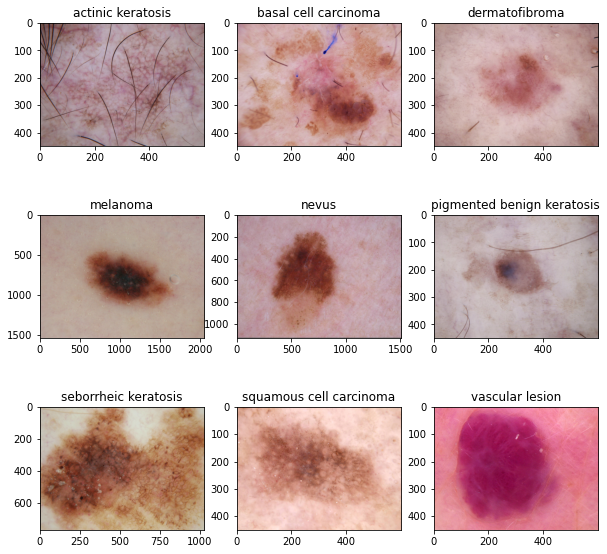

In [10]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [16]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


C:\Users\naray\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 116s 2s/step - loss: 2.0720 - accuracy: 0.1864 - val_loss: 2.0286 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 99s 2s/step - loss: 2.0223 - accuracy: 0.1936 - val_loss: 1.9841 - val_accuracy: 0.1946
Epoch 3/30
56/56 [==============================] - 109s 2s/step - loss: 1.9625 - accuracy: 0.2511 - val_loss: 1.9209 - val_accuracy: 0.2774
Epoch 4/30
56/56 [==============================] - 106s 2s/step - loss: 1.8788 - accuracy: 0.2801 - val_loss: 1.8966 - val_accuracy: 0.2931
Epoch 5/30
56/56 [==============================] - 106s 2s/step - loss: 1.8518 - accuracy: 0.3097 - val_loss: 1.8085 - val_accuracy: 0.3020
Epoch 6/30
56/56 [==============================] - 104s 2s/step - loss: 1.7425 - accuracy: 0.3672 - val_loss: 1.7219 - val_accuracy: 0.3781
Epoch 7/30
56/56 [==============================] - 97s 2s/step - loss: 1.6685 - accuracy: 0.3800 - val_loss: 1.7767 - val_accuracy: 0.3848
Epoch 8/30
56/56 [========

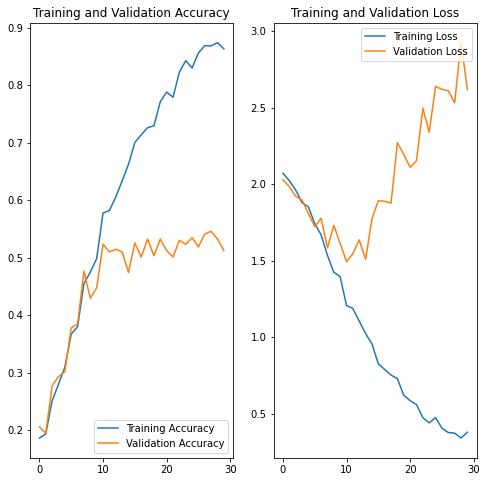

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

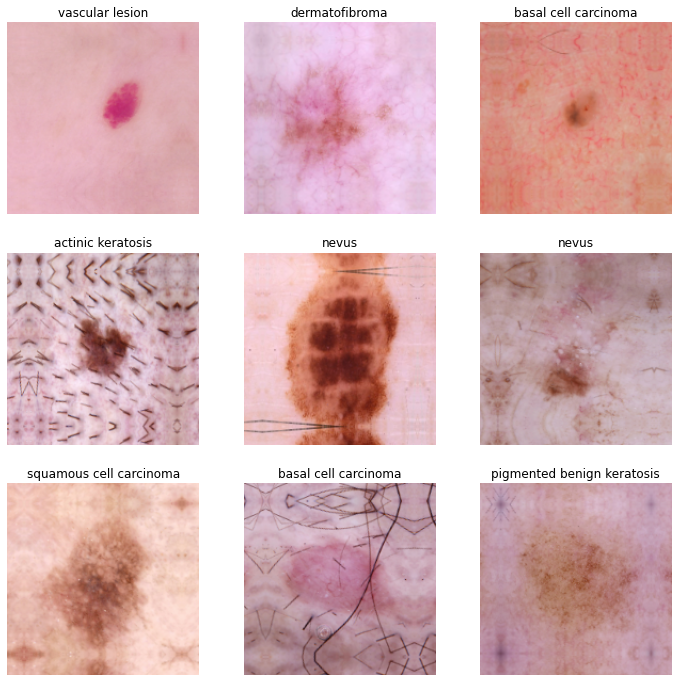

In [20]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [23]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
## Your code goes here, note: train your model for 100 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 125s 2s/step - loss: 1.6688 - accuracy: 0.4085 - val_loss: 1.6034 - val_accuracy: 0.4609
Epoch 2/20
56/56 [==============================] - 120s 2s/step - loss: 1.5733 - accuracy: 0.4520 - val_loss: 1.8251 - val_accuracy: 0.3848
Epoch 3/20
56/56 [==============================] - 113s 2s/step - loss: 1.5677 - accuracy: 0.4464 - val_loss: 1.5720 - val_accuracy: 0.4564
Epoch 4/20
56/56 [==============================] - 114s 2s/step - loss: 1.5102 - accuracy: 0.4593 - val_loss: 1.4861 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 114s 2s/step - loss: 1.4610 - accuracy: 0.4816 - val_loss: 1.5377 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 103s 2s/step - loss: 1.4517 - accuracy: 0.4883 - val_loss: 1.4860 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 105s 2s/step - loss: 1.4294 - accuracy: 0.4972 - val_loss: 1.4726 - val_accuracy: 0.5145
Epoch 8/20
56

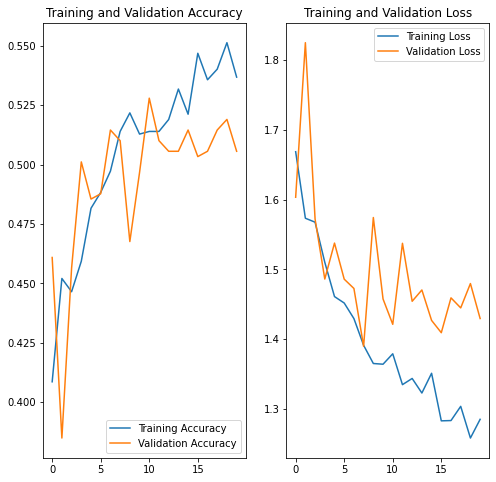

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
1,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
2,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
3,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
4,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
...,...,...
2234,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,vascular lesion
2235,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,vascular lesion
2236,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,vascular lesion
2237,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,vascular lesion


In [28]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
1,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
2,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
3,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
4,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,actinic keratosis
...,...,...
2234,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,vascular lesion
2235,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,vascular lesion
2236,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,vascular lesion
2237,C:\Users\naray\OneDrive\Documents\Upgrad\Neura...,vascular lesion


<BarContainer object of 9 artists>

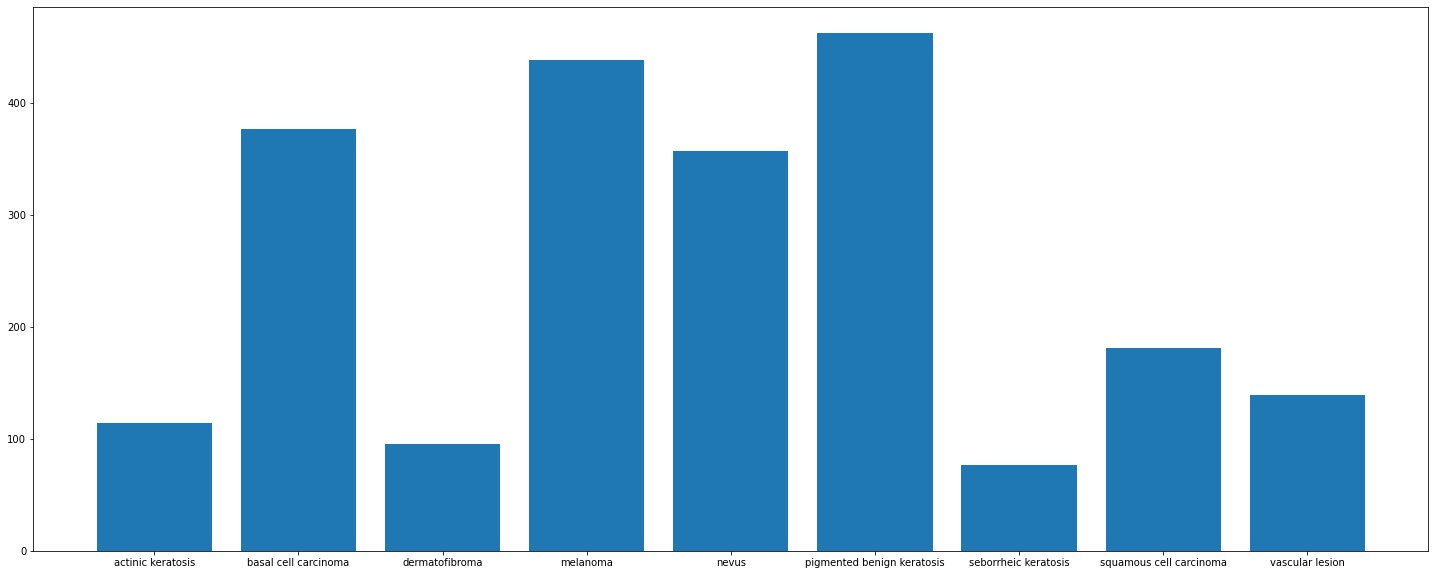

In [29]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

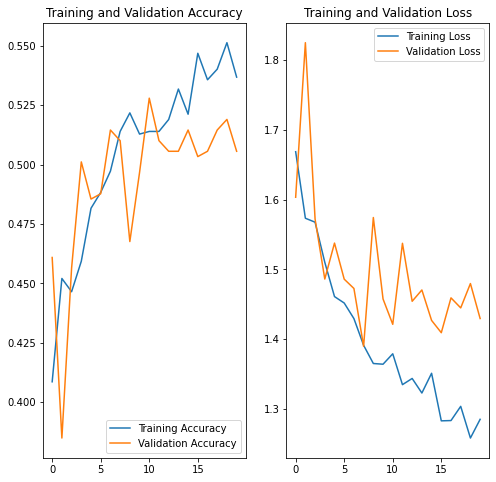

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Findings
- Seborrheic keratosis is having the lowest distribution
- Pigmented Benign keratosis is having the highest distribution of data